In [152]:
import random
from tqdm import tqdm
import pandas as pd
import numpy as np

## Blackjack Deck Simulation: `deck_50perc()` Function

The `deck_50perc()` function creates a simulated deck with 50% of its cards randomly removed. Here's a breakdown of the function:

- **Parameters**:
  - `deck_count`: Specifies the number of decks being used (in this case, 5).
  - `cards`: List of possible card values, representing cards from 2 through 10 and face cards ('K', 'Q', 'J', 'A').
  - `deck`: Constructs a full deck with each card appearing four times (standard suit distribution) and multiplied by `deck_count`.

- **Random Removal**:
  - Using `random.sample()`, the function randomly removes half of the cards from `deck`.
  - `deck.remove(i)`: Removes each selected card from `deck` until half of the deck is gone.


In [2]:
def deck_50perc():
    deck_count = 5
    cards = list(range(2,11))+['K','Q','J','A']
    deck = cards*4*deck_count
    for i in random.sample(deck,deck_count*52//2):
        deck.remove(i)
    return deck

In [3]:
deck = deck_50perc()

In [4]:
len(deck)

130

## Blackjack Card Points: `points` Dictionary

The `points` dictionary is used to assign values to each card in a blackjack deck. This dictionary comprehension assigns points based on standard blackjack rules:

- **Ace ('A')**: Has a dual value of either 1 or 11, represented by `(1, 11)`.
- **Face Cards ('K', 'Q', 'J') and 10**: All have a value of 10.
- **Number Cards (2 through 9)**: Each card has its face value (e.g., 2, 3, ..., 9).


In [5]:
points = {i: (1, 11) if i == 'A' else 10 if i in ['K', 'Q', 'J', 10] else i for i in list(range(2,11))+['K','Q','J','A']}

In [6]:
points

{2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 'K': 10,
 'Q': 10,
 'J': 10,
 'A': (1, 11)}

In [7]:
list(points.keys())

[2, 3, 4, 5, 6, 7, 8, 9, 10, 'K', 'Q', 'J', 'A']

## Blackjack Card Draw: `hit()` Function

The `hit()` function simulates drawing a card from the deck and retrieves its corresponding point value based on blackjack rules.

- **Process**:
  - `card = random.choice(deck)`: Randomly selects a card from the `deck`.
  - `return (card, points[card])`: Returns a tuple with the card and its point value from the `points` dictionary.

The function provides a quick way to simulate a hit action in blackjack, giving both the card drawn and its value for scoring purposes.


In [8]:
def hit():
    card = random.choice(deck)
    return (card, points[card])

In [9]:
hit()

(4, 4)

## Blackjack Possible Dealer Hands: `possible_dealer_hands` Set

The `possible_dealer_hands` set stores all potential dealer hands composed of a face card (King, Queen, Jack, or 10) and another card, along with the combined point total for each hand.

- **Loop Structure**:
  - The outer loop iterates over face cards (`K`, `Q`, `J`, `10`).
  - The inner loop iterates over possible second cards (`2` through `10`, `K`, `Q`, `J`).

- **Set Construction**:
  - For each pair of cards `(i, j)`, two entries are added to `possible_dealer_hands`:
    - `(i, j, points[i] + points[j])`: Represents the first card as the face card and the second card as another possible value.
    - `(j, i, points[i] + points[j])`: Ensures all possible card orderings are included in the set.

This set captures all feasible starting hands and their totals for the dealer, simplifying access to predefined dealer hand combinations.


In [108]:
possible_dealer_hands=set()
for i in ['K', 'Q', 'J', 10]:
    for j in [2,3,4,5,6,7,8,9,10,'K', 'Q', 'J']:
        possible_dealer_hands.add((i,j,points[i]+points[j]))
        possible_dealer_hands.add((j,i,points[i]+points[j]))

## Blackjack Possible Player Hands: `possible_player_hands` Set

The `possible_player_hands` set defines all potential player hands that sum up to 12, which is crucial for simulating specific scenarios in blackjack.

- **Loop Structure**:
  - **Number Cards (2 through 10)**:
    - For each card `i` in the range 2 to 10, a second card is selected as `12 - i`, ensuring the pair of cards totals 12.
  - **Face Cards ('K', 'Q', 'J')**:
    - Each face card (`K`, `Q`, `J`) pairs with the card 2, adding combinations that sum to 12 with face cards.

- **Set Construction**:
  - For each combination, two entries are added to `possible_player_hands` to account for both card orderings:
    - `(i, 12 - i, 12)`: Ensures hands with number cards sum to 12.
    - `(i, 2, 12)` and `(2, i, 12)`: Adds face card combinations that total 12.

This set provides a collection of all possible player hands that add up to 12, facilitating targeted simulations for player hands in blackjack.


In [98]:
possible_player_hands = set()
for i in range(2,11):
    possible_player_hands.add((i,12-i,12))
for i in ['K','Q','J']:
    possible_player_hands.add((i,2,12))
    possible_player_hands.add((2,i,12))

## Removing Cards from Deck: `remove_from_deck()` Function

The `remove_from_deck()` function removes specific cards from the deck, simulating the use of those cards in gameplay.

- **Parameters**:
  - `items`: A list of cards to be removed from `deck`.

- **Function Logic**:
  - The function iterates over each card in `items`.
  - For each card `i`, `deck.remove(i)` removes it from the `deck`.

This function is useful for updating the deck dynamically, ensuring that once cards are drawn, they are no longer available in subsequent actions.


In [16]:
def remove_from_deck(items):
    for i in items:
        deck.remove(i)

## Player Bust Check: `player_bust()` Function

The `player_bust()` function checks if the player’s total points exceed the limit in blackjack, resulting in a bust.

- **Parameters**:
  - `tot_pts`: The player’s current total points.

- **Function Logic**:
  - Returns `True` if `tot_pts` is greater than 21, indicating a bust.
  - Returns `False` otherwise, meaning the player is still in play.

This function is essential for determining when a player’s hand exceeds the blackjack threshold.


In [20]:
def player_bust(tot_pts):
    return tot_pts>21

## Winner Determination: `decide_winner()` Function

The `decide_winner()` function compares the player’s and dealer’s point totals to determine the outcome of a blackjack round.

- **Parameters**:
  - `player_pts`: The total points of the player’s hand.
  - `dealer_pts`: The total points of the dealer’s hand.

- **Return Values**:
  - `1` if the player’s points are higher than the dealer’s, indicating a player win.
  - `0` if the points are equal, resulting in a tie.
  - `-1` if the dealer’s points are higher, indicating a player loss.

This function provides a straightforward way to evaluate the round outcome based on standard blackjack rules.


In [21]:
def decide_winner(player_pts,dealer_pts):
    if player_pts > dealer_pts:
        return 1
    elif player_pts == dealer_pts:
        return 0
    else:
        return -1

## Experiment Variable: `exp`

The variable `exp` is set to 1000, typically representing the number of trials or experiments in a simulation.

- **Purpose**:
  - This value is commonly used in scenarios where you want to run multiple simulations to gather statistical data or evaluate performance over a large number of iterations.

Setting `exp` to 1000 allows for robust data collection, providing insights into the behavior of the game mechanics or outcomes being analyzed.


In [26]:
exp=1000

## Simulation of Blackjack Outcomes

The following code simulates the outcomes of blackjack hands for various combinations of player and dealer hands, tracking wins, losses, and draws over a specified number of experiments.

### Code Overview

- **Data Structure**:
  - `data`: A list to store the results of each simulation, capturing dealer and player hands along with their win/loss statistics.

- **Outer Loop**:
  - Iterates over each possible player hand in `possible_player_hands`.
  - Iterates over each possible dealer hand in `possible_dealer_hands`.

- **Frequency Counters**:
  - `dealer_win_freq`: Counts the number of times the dealer wins.
  - `player_win_freq`: Counts the number of times the player wins.
  - `draw_freq`: Counts the number of draws.

- **Inner Loop**:
  - Runs `exp` simulations (set to 1000) for each combination of player and dealer hands.
  - Calls `deck_50perc()` to create a deck with 50% of the cards removed.
  - Initializes `did_player_bust` to track if the player busts and sets `tot_pts` to the player's initial total points.

- **Gameplay Logic**:
  - The player draws cards until their total points are 17 or higher.
  - The player's card is removed from the deck.
  - If an Ace is drawn, it increments the total points by 1.
  - Checks for a bust using the `player_bust()` function.

- **Outcome Determination**:
  - If the player busts, the dealer wins.
  - Uses `decide_winner()` to determine if the dealer wins, the player wins, or if it's a draw.
  - Updates the frequency counters accordingly.

- **Result Storage**:
  - Appends a dictionary to `data` for each combination of hands, containing the dealer's and player's hands, along with their respective win counts and draw counts.

This simulation allows for the analysis of the player's and dealer's performance under various conditions, providing valuable insights into the game's dynamics.


In [169]:
data=[] 
for player in tqdm(possible_player_hands):
    for dealer in possible_dealer_hands:
        dealer_win_freq = 0
        player_win_freq = 0
        draw_freq = 0
        for i in range(exp):
            deck = deck_50perc()
            did_player_bust = -1
            tot_pts = player[-1]
            while tot_pts<17:
                player_card = hit()
                remove_from_deck([player_card[0]])
                if player_card[0] == 'A':
                    tot_pts+=1
                else:
                    tot_pts+=player_card[1]
                    if player_bust(tot_pts):
                        did_player_bust=1
            if did_player_bust==1:
                dealer_win_freq+=1
            elif decide_winner(tot_pts, dealer[-1])==-1:
                dealer_win_freq+=1
            elif decide_winner(tot_pts,dealer[-1])==0:
                draw_freq+=1
            else:
                player_win_freq+=1 
        data.append({'dealer':dealer, 'player':player, 'dealer_win':dealer_win_freq,'player_win':player_win_freq, 'push':draw_freq})

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [02:17<00:00,  9.16s/it]


## Creating a DataFrame: `df`

The line of code `df = pd.DataFrame(data)` converts the `data` list, which contains simulation results, into a Pandas DataFrame for easier analysis and visualization.

### Overview

- **Data Structure**:
  - The `data` list is expected to contain dictionaries, each representing the outcome of a simulation round with keys for dealer hands, player hands, and their respective win/loss statistics.

- **Purpose**:
  - A DataFrame provides a tabular format that allows for efficient data manipulation, aggregation, and statistical analysis.
  - It enables the use of Pandas functions to summarize the results, visualize data, and perform further computations.

This transformation is a crucial step for analyzing the results of the blackjack simulations systematically.


In [175]:
df = pd.DataFrame(data)

## Normalizing Win/Loss Statistics

The line of code `df[['dealer_win', 'player_win', 'push']] = df[['dealer_win', 'player_win', 'push']] / exp` normalizes the win/loss statistics in the DataFrame by dividing each count by the number of experiments (`exp`).

### Purpose

- **Normalization**:
  - This operation converts the raw counts of wins for the dealer, player, and pushes into proportions or probabilities, providing a clearer understanding of the outcomes relative to the total number of experiments.
  
- **Columns Affected**:
  - `dealer_win`: Now represents the proportion of dealer wins.
  - `player_win`: Now represents the proportion of player wins.
  - `push`: Now represents the proportion of draws.

Normalizing these statistics is essential for interpreting the results effectively, as it allows for comparisons across different hands and scenarios without being skewed by the total number of simulations.


In [177]:
df[['dealer_win', 'player_win', 'push']] = df[['dealer_win', 'player_win', 'push']] / exp

In [178]:
df.dealer_win.mean()

np.float64(0.5758)

In [179]:
df.player_win.mean()

np.float64(0.3724125)

In [180]:
df.push.mean()

np.float64(0.05178749999999999)

In [181]:
df

,dealer,player,dealer_win,player_win,push
0,"(J, 8, 18)","(K, 2, 12)",0.577,0.310,0.113
1,"(10, 3, 13)","(K, 2, 12)",0.497,0.503,0.000
2,"(J, 4, 14)","(K, 2, 12)",0.479,0.521,0.000
3,"(Q, K, 20)","(K, 2, 12)",0.800,0.095,0.105
4,"(5, Q, 15)","(K, 2, 12)",0.494,0.506,0.000
...,...,...,...,...,...
1195,"(Q, 2, 12)","(4, 8, 12)",0.488,0.512,0.000
1196,"(7, K, 17)","(4, 8, 12)",0.485,0.417,0.098
1197,"(2, J, 12)","(4, 8, 12)",0.506,0.494,0.000
1198,"(4, J, 14)","(4, 8, 12)",0.490,0.510,0.000


## Exporting Results to CSV

The line of code `df.to_csv('stats.csv', index=False)` exports the DataFrame `df` to a CSV file named `stats.csv`.

### Overview

- **Functionality**:
  - This operation saves the normalized win/loss statistics and other data contained in the DataFrame to a CSV format, making it easy to share, analyze, or import into other tools.

- **Parameters**:
  - `index=False`: This parameter ensures that the DataFrame index is not included in the CSV file, resulting in a cleaner output with only the data columns.

Exporting the results to a CSV file is a practical step for documenting the outcomes of the blackjack simulations and allows for further analysis using spreadsheet software or data analysis tools.


In [183]:
df.to_csv('stats.csv', index=False)

## Total Number of Simulations

The expression `len(possible_dealer_hands) * len(possible_player_hands) * exp` calculates the total number of simulations conducted in the blackjack analysis.

### Breakdown

- **Components**:
  - `len(possible_dealer_hands)`: The number of unique dealer hands considered in the simulations.
  - `len(possible_player_hands)`: The number of unique player hands considered in the simulations.
  - `exp`: The number of experiments (set to 1000) run for each combination of player and dealer hands.

### Purpose

This calculation provides insight into the overall scale of the simulation, indicating how many rounds of blackjack were played in total. It helps to assess the robustness of the results and the statistical reliability of the findings. Understanding the total number of simulations is crucial for evaluating the significance of the outcomes observed in the analysis.


In [185]:
len(possible_dealer_hands)*len(possible_player_hands)*exp

1200000

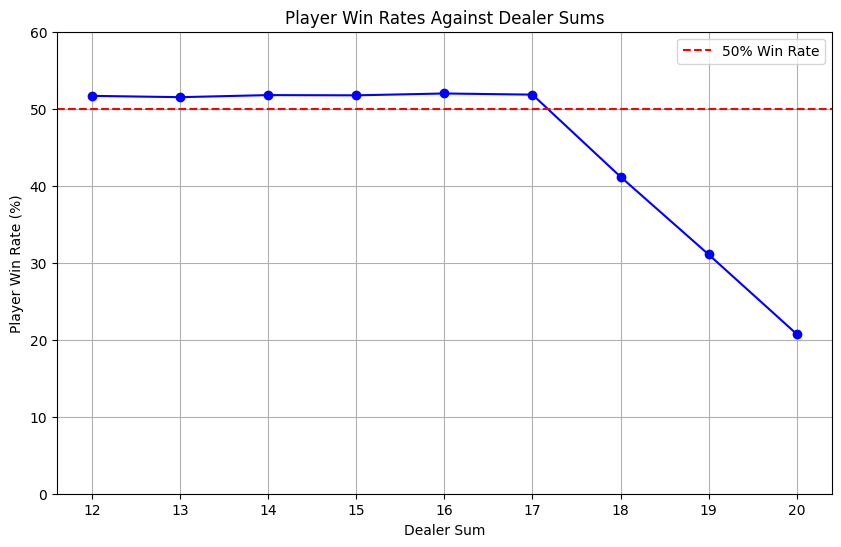

In [194]:
import matplotlib.pyplot as plt

# Data for player win rates against dealer sums
dealer_sums = [12, 13, 14, 15, 16, 17, 18, 19, 20]
win_rates = [
    51.67,  # Against dealer showing 12
    51.50,  # Against dealer showing 13
    51.77,  # Against dealer showing 14
    51.74,  # Against dealer showing 15
    51.98,  # Against dealer showing 16
    51.83,  # Against dealer showing 17
    41.16,  # Against dealer showing 18
    31.07,  # Against dealer showing 19
    20.74   # Against dealer showing 20
]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(dealer_sums, win_rates, marker='o', linestyle='-', color='blue')
plt.title('Player Win Rates Against Dealer Sums')
plt.xlabel('Dealer Sum')
plt.ylabel('Player Win Rate (%)')
plt.xticks(dealer_sums)
plt.ylim(0, 60)
plt.grid()
plt.axhline(y=50, color='r', linestyle='--', label='50% Win Rate')
plt.legend()
plt.show()
